In [1]:
import numpy as np


In [10]:
x = np.arange(0,105,5)

In [11]:
x

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [15]:
y=[0,2.25,9,20.25,36,56.25,81,110.249,144,182.25,225,272.25,324,380.25,441,506.25,576,650.25,729,812.25,900]

In [16]:
import matplotlib.pyplot as plt

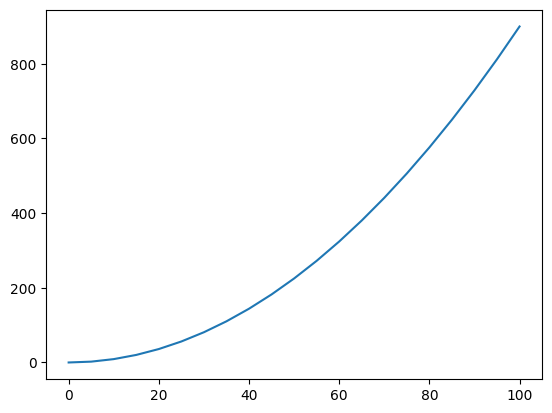

In [17]:
plt.plot(x,y)

In [26]:
coef = np.polyfit(x,y,2)

In [27]:
coef[0] * x**2+coef[1]*x+coef[2]

array([-8.46979097e-06,  2.24997199e+00,  8.99995492e+00,  2.02499403e+01,
        3.59999282e+01,  5.62499185e+01,  8.09999113e+01,  1.10249907e+02,
        1.43999904e+02,  1.82249904e+02,  2.24999907e+02,  2.72249912e+02,
        3.23999920e+02,  3.80249930e+02,  4.40999942e+02,  5.06249957e+02,
        5.75999975e+02,  6.50249995e+02,  7.29000017e+02,  8.12250042e+02,
        9.00000069e+02])

In [70]:
from scipy.optimize import minimize

def trading_fee(x):
    return coef[0] * x**2+coef[1]*x+coef[2]
# products = [fridge, earrings, e-blanket, sleds, sculptures, ps6,moustache, lava, chocolate]
expected_returns = [10,30,25,30,25,15,30,5,10]

def objective(weights):
    expected_return = np.dot(weights, expected_returns)
    total_fee = np.sum([trading_fee(x) for x in weights])
    return -expected_return + total_fee
constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 100}]
bounds = [(0, 100) for _ in range(len(expected_returns))]
initial_guess = [1 / len(expected_returns) for _ in range(len(expected_returns))]
# Solve the optimization problem
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Get the optimal weights for the portfolio
optimal_weights = result.x

print("Optimal portfolio weights:", optimal_weights)

Optimal portfolio weights: [ 0.         31.11107349  3.33335178 31.11107349  3.33335178  0.
 31.11114947  0.          0.        ]


In [46]:
import pulp as pl